Carga de bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Loading of data

In [7]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date']
)
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


Visualize the number of rows and columns

In [16]:
sales.shape

(113036, 18)

Analyze the number of non-null rows and the type of data

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

Descriptive Statsitics of dataset

In [20]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


**Numerical Aanalysis and Visualization**

In [9]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [24]:
sales['Unit_Cost'].mean()

267.296365759581

In [25]:
sales['Unit_Cost'].median()

9.0

<AxesSubplot: >

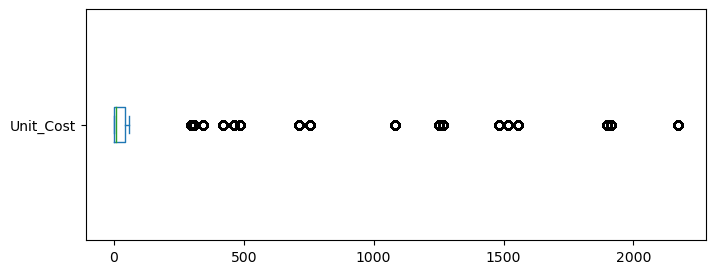

In [29]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize = (8,3))

<AxesSubplot: ylabel='Density'>

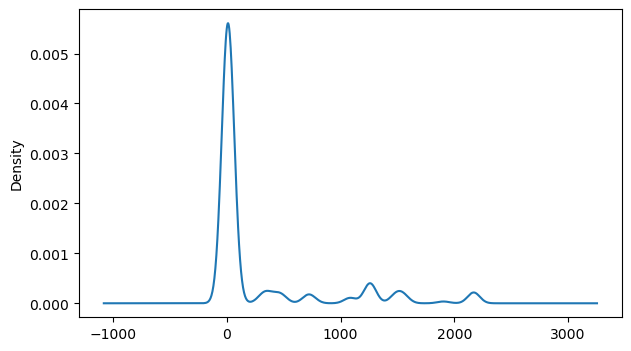

In [10]:
sales['Unit_Cost'].plot(kind='density',figsize=(7,4))

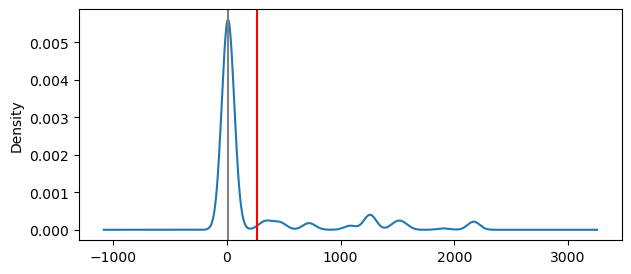

In [34]:
ax = sales['Unit_Cost'].plot(kind='density',figsize=(7,3))
ax.axvline(sales['Unit_Cost'].mean(),color='red')
ax.axvline(sales['Unit_Cost'].median(),color='gray')

Text(0.5, 0, 'Dollars')

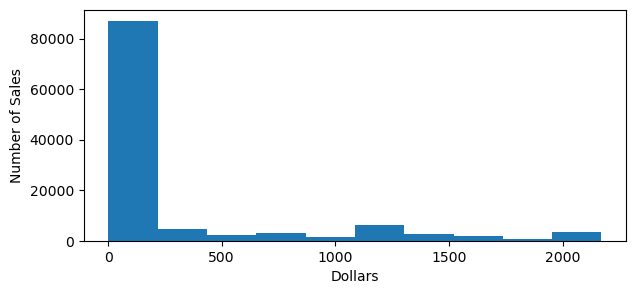

In [36]:
ax = sales['Unit_Cost'].plot(kind='hist',figsize=(7,3))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

**Categorical Analysis and Visualization**

In [37]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot: ylabel='Age_Group'>

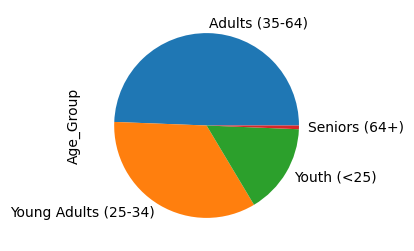

In [39]:
sales['Age_Group'].value_counts().plot(kind='pie',figsize=(3,3))

Text(0, 0.5, 'Number of Values')

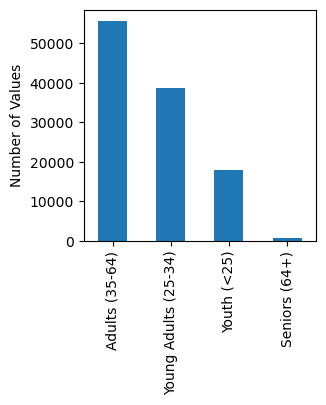

In [41]:
ax = sales['Age_Group'].value_counts().plot(kind='bar',figsize=(3,3))
ax.set_ylabel('Number of Values')

**Relationship between the columns**

In [43]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


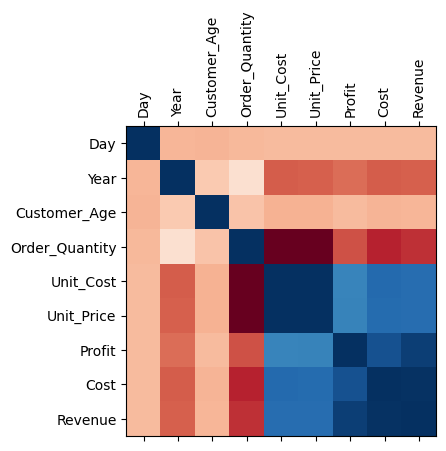

In [46]:
fig = plt.figure(figsize=(4,4))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

<AxesSubplot: xlabel='Customer_Age', ylabel='Revenue'>

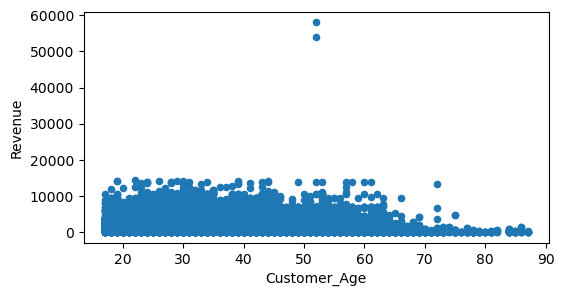

In [49]:
sales.plot(kind='scatter',x='Customer_Age',y='Revenue',figsize=(6,3))

<AxesSubplot: xlabel='Revenue', ylabel='Profit'>

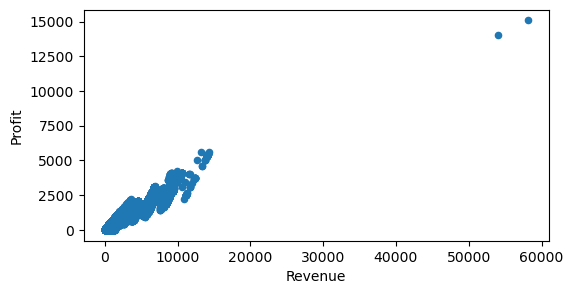

In [50]:
sales.plot(kind='scatter',x='Revenue',y='Profit',figsize=(6,3))

Text(0, 0.5, 'Profit')

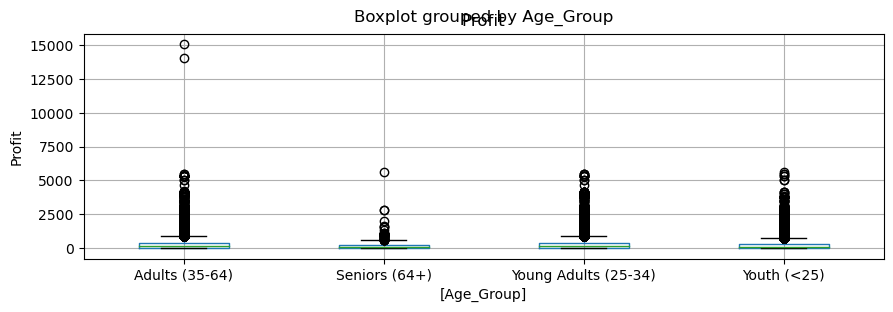

In [53]:
ax = sales[['Profit','Age_Group']].boxplot(by='Age_Group',figsize=(10,3))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.53;0.227941x0.35)
Customer_Age      AxesSubplot(0.398529,0.53;0.227941x0.35)
Order_Quantity    AxesSubplot(0.672059,0.53;0.227941x0.35)
Unit_Cost            AxesSubplot(0.125,0.11;0.227941x0.35)
Unit_Price        AxesSubplot(0.398529,0.11;0.227941x0.35)
Profit            AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

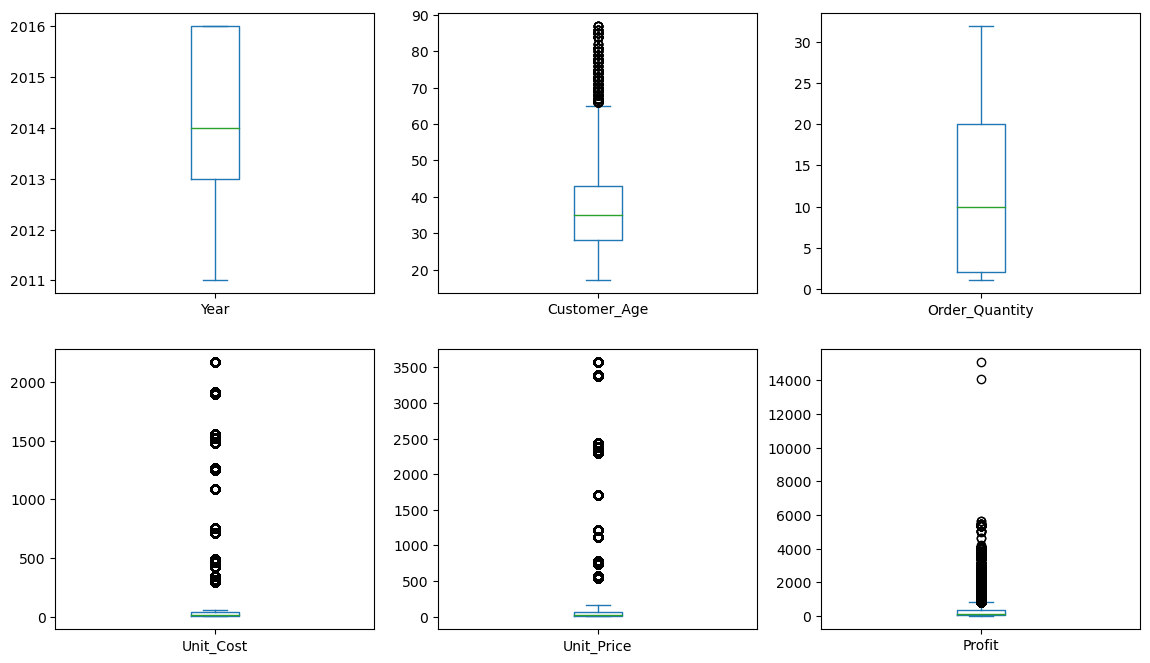

In [55]:
boxplot_cols = ['Year', 'Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit']

sales[boxplot_cols].plot(kind='box',subplots=True,layout=(2,3),figsize=(14,8))